## Notebook for Figure 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from crick import TDigest

from one_pass import __version__ as one_pass_version
from one_pass.opa import Opa
from utils import read_or_download_dataset

print(f"One_Pass version: {one_pass_version}")

One_Pass version: 0.7.2


Creating 6 random data sets of different lengths

In [2]:
data1 = np.random.rand(50)
data2 = np.random.rand(100)
data3 = np.random.rand(200)
data4 = np.random.rand(350)
data5 = np.random.rand(500)
data6 = np.random.rand(1000)

Adding the random data sets to TDigest objects with different compression factors to see how many clusters / centroids are created with each compression factor

In [3]:
# range of compression factors to test
min_comp = 20
max_comp = 140

spacing = 2 

compressions = np.linspace(min_comp, max_comp, int((max_comp - min_comp)/spacing)+1)

# initalising empty vectors for the different data sets
digest_list = []
digest_list2 = []
digest_list3 = []
digest_list4 = []
digest_list5 = []
digest_list6 = []
digest_size = np.zeros((len(compressions), 6))

# for each data set, creating a TDigest object over the range of different compressions
for c, compression in enumerate(compressions):
    digest_list.append(TDigest(compression=compression))
    digest_list2.append(TDigest(compression=compression))
    digest_list3.append(TDigest(compression=compression))
    digest_list4.append(TDigest(compression=compression))
    digest_list5.append(TDigest(compression=compression))
    digest_list6.append(TDigest(compression=compression))

    digest_list[c].update(data1)
    digest_list2[c].update(data2)
    digest_list3[c].update(data3)
    digest_list4[c].update(data4)
    digest_list5[c].update(data5)
    digest_list6[c].update(data6)
    
    # extracting the number of centroids created for each compression
    digest_size[c, 0] = len(digest_list[c].centroids())
    digest_size[c, 1] = len(digest_list2[c].centroids())
    digest_size[c, 2] = len(digest_list3[c].centroids())
    digest_size[c, 3] = len(digest_list4[c].centroids())
    digest_size[c, 4] = len(digest_list5[c].centroids())
    digest_size[c, 5] = len(digest_list6[c].centroids())

Calculating the memory required in kB based on the number of centroids, each requiring a mean and a weight with 8 B of storage for each

In [4]:
mem = (digest_size[:, -1] * 2 * 8) / 1000  # kB

Plotting

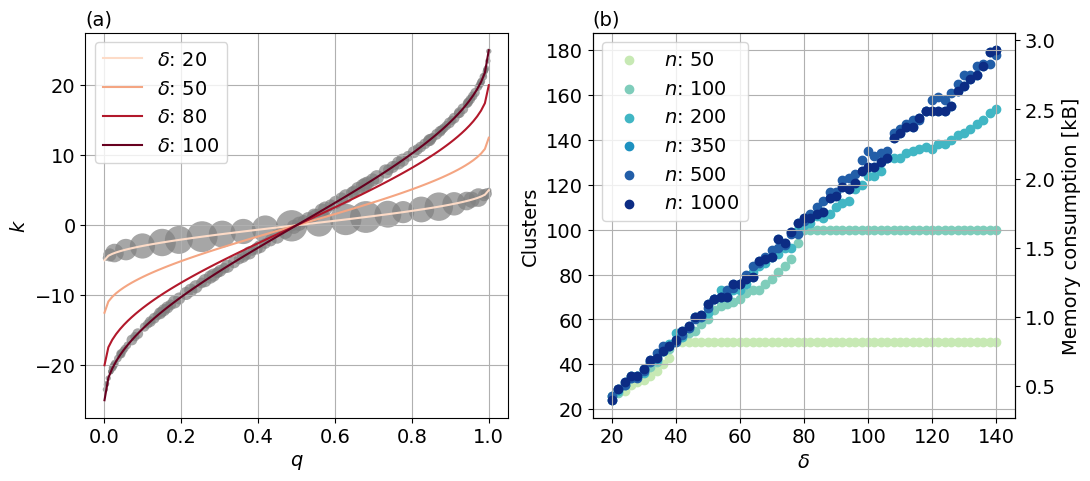

In [5]:
fs = 14
c1 = '#c7e9b4'
c2 = '#7fcdbb'
c3 = '#41b6c4'
c4 = '#1d91c0'
c5 = '#225ea8'
c6 = '#0c2c84'

c4p = '#67001f'
c3p = '#b2182b'
c2p = '#f4a582'
c1p = '#fddbc7'

pinks = [c1p, c2p, c3p, c4p]

fig, ax = plt.subplots(1,2,figsize = (12,5)) 

ax0 = ax[0]

x_values = np.linspace(0,1,100)
delta_all = [20, 50, 80, 100]

for indx, delta in enumerate(delta_all):
    y_values = delta/(2*np.pi)*np.arcsin(2*x_values - 1)
    ax0.plot(x_values, y_values, label=rf'$\delta$: {int(delta)}', color = pinks[indx])
    if delta == 20:
        means = digest_list5[0].centroids()['mean'] # 0 is the first with compression = 20
        weights = digest_list5[0].centroids()['weight']
        y_values_select = delta/(2*np.pi)*np.arcsin(2*means - 1)
        ax0.scatter(means, y_values_select, s=weights* 15, c='grey', alpha=0.7, edgecolors='none')  # s controls size
    elif delta == 100:
        means = digest_list5[40].centroids()['mean'] # 40 is the first with compression = 100
        weights = digest_list5[40].centroids()['weight']
        y_values_select = delta/(2*np.pi)*np.arcsin(2*means - 1)
        ax0.scatter(means, y_values_select, s=weights* 15, c='grey', alpha=0.7, edgecolors='none')  # s controls size

# Adding labels and title
ax0.set_xlabel(r'$q$', fontsize = fs)
ax0.set_ylabel(r'$k$', fontsize = fs)
ax0.grid(True)
ax0.legend(fontsize = fs)
ax0.tick_params(axis='y', labelcolor='black', labelsize = fs)
ax0.tick_params(axis='x', labelcolor='black', labelsize = fs)
ax0.set_title('(a)', fontsize = fs, loc = 'left')


ax1 = ax[1]
# Create a scatter plot
ax1.scatter(compressions, digest_size[:,0], color = c1, label = r'$n$: 50')
ax1.scatter(compressions, digest_size[:,1], color = c2, label = r'$n$: 100')
ax1.scatter(compressions, digest_size[:,2], color = c3, label = r'$n$: 200')
ax1.scatter(compressions, digest_size[:,3], color = c4, label = r'$n$: 350')
ax1.scatter(compressions, digest_size[:,4], color = c5, label = r'$n$: 500')
ax1.scatter(compressions, digest_size[:,3], color = c6, label = r'$n$: 1000')

# Add labels and title
ax1.set_xlabel(r'$\delta$', fontsize = fs)
ax1.set_ylabel('Clusters', fontsize = fs)
ax1.tick_params(axis='y', labelcolor='black', labelsize = fs)
ax1.tick_params(axis='x', labelcolor='black', labelsize = fs)
ax1.legend(fontsize = fs)
ax1.grid(True) 
ax1.set_title('(b)', fontsize = fs, loc = 'left')

# Create the second y-axis scatter plot
ax2 = ax1.twinx()
ax2.scatter(compressions, mem, marker = '')
ax2.set_ylabel('Memory consumption [kB]', color='black', fontsize = fs)
ax2.tick_params(axis='y', labelcolor='black', labelsize = fs)

# Show the plot
plt.show()